In [1]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pathOfTheYeastTrackAnalysisFolder = '/Users/Yidi/Desktop/YeastTrackAnalysis-master/'
pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

# read data

In [6]:
#path = "/Users/Yidi/Desktop/YeastTrackAnalysis-master/"
path = "/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/"
#folder = 'dataToAnalyze/'
folder = 'sample_data/'

################
# THESE ARE THE ONLY PARAMETERS TO CHANGE

# change your filename to the file you want to analyze
file = '69.csv'

# 
frameToSecondConversion = 0.137
pixelToNanometerConversion = 65

# if your file is a CSV: put FALSE
# if your file is a EXCEL: put TRUE
isExcel = False


################


outputpath = path+folder

In [7]:
if (isExcel):
    data = pd.read_excel(path+folder+file)
else:
    data = pd.read_csv(path+folder+file)
dataIndex = np.invert(np.isnan(data['x']))
data = data[dataIndex]
data[0:5]

,,Frame,x,y,z,m0,m1,m2,m3,m4,NPscore,Unnamed: 11,Trajectory
0,1,0,122.76592,225.92624,0,1.80532,2.20263,6.06306,19.09633,66.50091,0.02076,NaN,69
1,2,1,122.95885,226.69484,0,2.03737,2.30347,6.58104,21.38411,76.25267,0.00743,NaN,69
2,3,2,122.74081,225.94617,0,1.53397,2.22077,6.37614,21.33374,79.38977,0.01409,NaN,69
3,4,3,122.50288,225.89490,0,1.70772,1.97097,5.03242,15.20385,52.40523,0.02529,NaN,69
4,5,4,123.25535,226.80550,0,2.34990,2.50120,7.65292,26.27337,97.68337,0.01037,NaN,69


# Trajectory in x,y

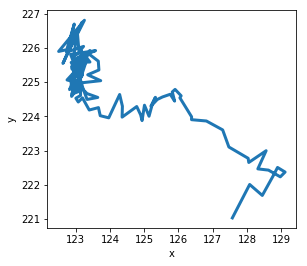

In [8]:

x = data['x']
y = data['y']
plt.plot(x,y,lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(outputpath+file+'_traj_xy.png')

# distance from start

In [9]:
time = frameToSecondConversion*data['Frame']
distancesFromStart = []
for i in range(1,len(data)):
    v0 = np.array([x[0],y[0]])
    v1 = np.array([x[i],y[i]])
    dist = np.linalg.norm(v0-v1)
    distancesFromStart.append(dist)
distancesFromStart = pixelToNanometerConversion* np.array(distancesFromStart)



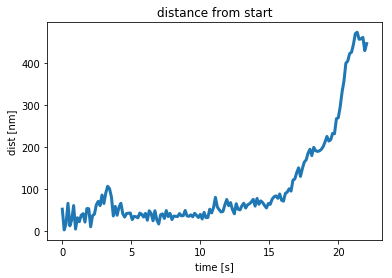

In [10]:
plt.plot(time[0:-1],distancesFromStart,lw=3)
plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
plt.savefig(outputpath+file+'_distToStart.png')

# intensity

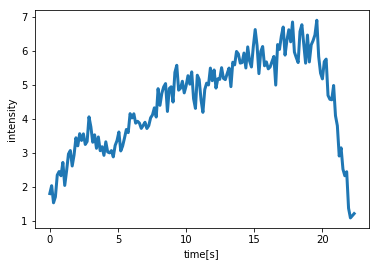

In [11]:

intensity = data['m0']
plt.plot(time,intensity,lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')
plt.savefig(file+'_intensity.png')

# speed

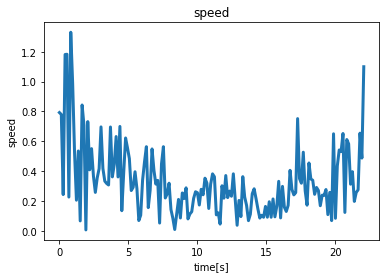

In [12]:
x = data['x']
y = data['y']
frameByFrameDistances = []
for i in range(1,len(data)):
    v0 = np.array([x[i-1],y[i-1]])
    v1 = np.array([x[i],y[i]])
    dist = np.linalg.norm(v0-v1)
    frameByFrameDistances.append(dist)
frameByFrameDistances = np.array(frameByFrameDistances)


plt.plot(time[0:-1],frameByFrameDistances,lw=3)
plt.title('speed')
plt.xlabel('time[s]')
plt.ylabel('speed')
plt.savefig(outputpath+file+'_speed.png')

# find inflection point

inflectionPointIndex: 117
inflectionPoint Frame: 117
inflectionPoint Intensity: 5.47356


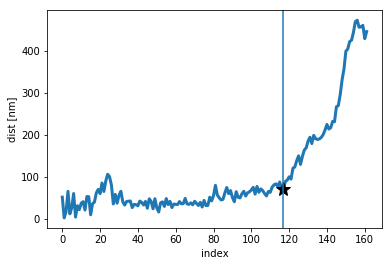

In [13]:


x=np.arange(0,len(distancesFromStart))
y=distancesFromStart

inflectionPointIndex = ytf.findInflectionPoint(x,y)
print("inflectionPointIndex: {}".format(inflectionPointIndex))
print("inflectionPoint Frame: {}".format(data['Frame'][inflectionPointIndex]))
print("inflectionPoint Intensity: {}".format(data['m0'][inflectionPointIndex]))


#plt.plot(x, newy, 'o', label='original data',color='b')
plt.plot(distancesFromStart,lw=3)
plt.plot(x[inflectionPointIndex],y[inflectionPointIndex], 'k*',markersize=15)
plt.axvline(x[inflectionPointIndex])

plt.xlabel('index')
plt.ylabel('dist [nm]')
plt.savefig(outputpath+file+'_inflectionPoint.png')

# plot distance and intensity at the same time

inflectionPoint Frame: 117
inflectionPoint Time[s]: 16.029
inflectionPoint Intensity: 5.47356


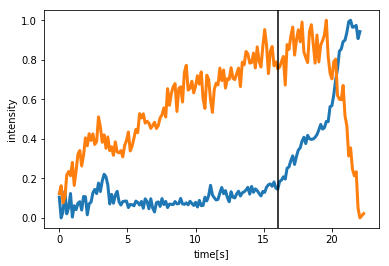

In [14]:
plt.plot(time[0:-1],(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart)),lw=3)
#plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
#plt.savefig(file+'_distToStart.png')


plt.plot(time,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')

plt.axvline(time[0:-1][inflectionPointIndex],c='k')
print("inflectionPoint Frame: {}".format(data['Frame'][inflectionPointIndex]))
print("inflectionPoint Time[s]: {}".format(frameToSecondConversion*(data['Frame'][inflectionPointIndex])))
print("inflectionPoint Intensity: {}".format(data['m0'][inflectionPointIndex]))

plt.savefig(outputpath+file+'_intensity+distance.png')

# statistics

In [15]:
print("max intensity: {}".format(np.max(data['m0'])))
print("first frame: {}".format(data['Frame'][0]))
print("last frame: {}".format(np.array(data['Frame'])[-1]))

lenthOfTrackInFrames = np.array(data['Frame'])[-1]-np.array(data['Frame'][0])
print("lenght of track [frames]: {}".format(lenthOfTrackInFrames))

print("lenght of track [s]: {}".format(frameToSecondConversion*lenthOfTrackInFrames))

max intensity: 6.903410000000001
first frame: 0
last frame: 163
lenght of track [frames]: 163
lenght of track [s]: 22.331000000000003
